# Homework #4
- Download the Mall Customer Segmentation Data from the github repository below (or you can directly use the one attached in the assignment.)
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots.
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d

In [ ]:
import pandas as pd
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
df.head(3)

Cloning into 'DATA602Datasets'...
remote: Enumerating objects: 72, done.
remote: Total 72 (delta 0), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (72/72), done.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall_df = df.drop(columns=["CustomerID", "Gender"])


In [ ]:
display(mall_df)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


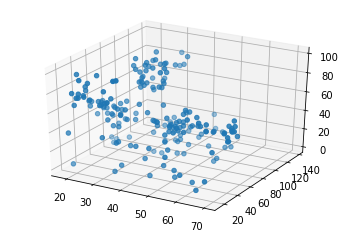

In [ ]:
a=plt.axes(projection="3d")
a.scatter(mall_df["Age"], mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"])
plt.show()

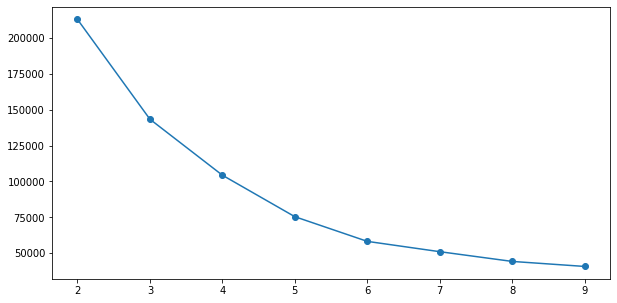

In [ ]:
scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(mall_df[["Age", "Annual Income (k$)","Spending Score (1-100)" ]])
  scores.append( -kmeans.score(mall_df) )

plt.figure(figsize=(10, 5))
plt.scatter([k for k in range(2,10)], scores)
plt.plot([k for k in range(2,10)], scores)


When we look at the graph of k vs. error for this dataset, there is no clear elbow point. This shows us that the elbow method does not work well for this dataset.
In order to perform the clustering, I will choose 5 as the K value since the error value is low and the point is like a elbow point.

In [ ]:
n_clusters=5 # Optimum number of classes according to the elbow method
y_pred = KMeans(n_clusters=n_clusters).fit_predict(mall_df)


In [ ]:
display(y_pred)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

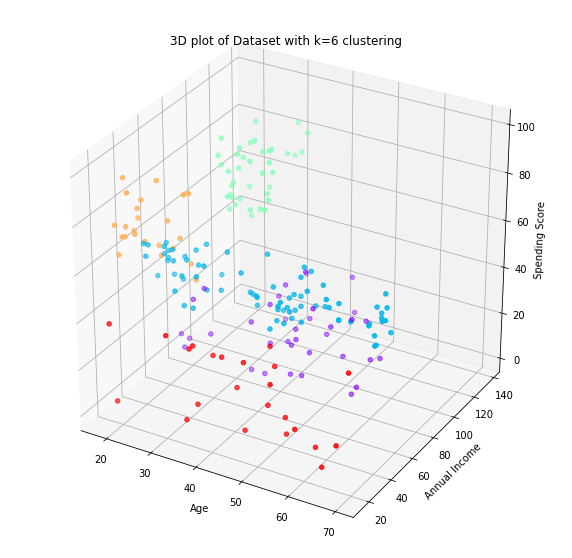

In [ ]:
plt.figure(figsize=(10, 10))
a=plt.axes(projection="3d")
a.scatter(mall_df["Age"], mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=y_pred, cmap=cm.rainbow)
a.set_xlabel("Age")
a.set_ylabel("Annual Income")
a.set_zlabel("Spending Score")
a.set_title("3D plot of Dataset with k=6 clustering")
plt.show()

